Importações

In [2]:
import sys
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from PIL import Image as im

mamae


Alterando configuração do Numpy para não "colapsar" o print dos vetores

In [ ]:
np.set_printoptions(threshold=sys.maxsize)

Métodos para lidar com as imagens

In [ ]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


# returns a numpy array(int) with 32x32 dimension 
def get_3_32_32_int_array(array):
  array_foo = np.reshape(array, (3,32,32))
  array_foo = np.swapaxes(array_foo, 0, 2)
  return array_foo

def get_8bit_str(decimal):
  return format(decimal, '08b')  

def get_msb(msb, decimal):
  bits = get_8bit_str(decimal)
  bits = bits[:msb]  
  return bits.ljust(8, '0')

def get_msb_alt(msb, bits):
  bits = bits[:msb]  
  return bits.ljust(8, '0')

def bits_to_decimal(bits):
  return int(bits, 2) 
  
def get_input_vector(array):
  output = ""
  for t in array:
    for y in t:
      for w in y:
        output = output + get_8bit_str(w)
  return output

def get_input_vector_cifar10_raw(array):
  output = ""
  for i in array:
    output = output + get_8bit_str(i)
  return output

def input_vector_to_intarray(input_vector, msr=False):
  bitstream = [input_vector[i:i+8] for i in range(0, len(input_vector), 8)]
  intarray = []
  if not msr:  
    for x in bitstream:
      intarray.append(bits_to_decimal(x))
  else:
    for x in bitstream:
      msr_bit = get_msb_alt(msr,x)
      intarray.append(bits_to_decimal(msr_bit))
  return intarray

def intarray_to_pre_img(intarray):
  npa = np.array(intarray)
  npa = np.reshape(npa, (32,32,3))
  #npa = np.swapaxes(npa, 0, 2)
  return npa


def show_cifar_img(int_array):
  array_foo = get_3_32_32_int_array(int_array)  
  img = im.fromarray(array_foo)
  #img = np.rot90(img)
  plt.imshow(img)
  plt.xlim(0.1,31.5)
  plt.ylim(0.1,31.5)
  plt.show()

def show_img(intarray):
  img = im.fromarray(np.uint8(intarray))
  plt.imshow(img)
  plt.xlim(0.1,31.5)
  plt.ylim(0.1,31.5)
  plt.show()

In [ ]:
dados = unpickle("data_batch_1")
print(dados.keys())
dados.get(b'data')[0]
print(dados.get(b'batch_label'))

labels = unpickle("batches.meta")
labels

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
b'training batch 1 of 5'


{b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_cases_per_batch': 10000,
 b'num_vis': 3072}

<class 'numpy.ndarray'>
(3072,)
(3, 32, 32)
(32, 32, 3)
<class 'numpy.ndarray'>


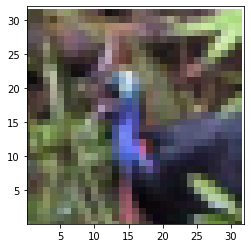

2


In [ ]:
array = dados.get(b'data')[24]
print(type(array))
print(array.shape)
array = np.reshape(array, (3,32,32))
print(array.shape)
dd1 = np.swapaxes(array, 0, 2)
print(dd1.shape)
print(type(dd1))
dd1 = np.rot90(dd1)

teste = im.fromarray(dd1)
plt.imshow(teste)
plt.xlim(0.1,32)
plt.ylim(0.1,32)
plt.show()
print(dados.get(b'labels')[24])

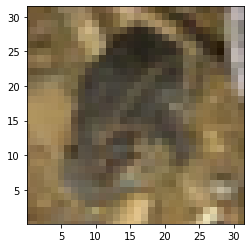

In [ ]:
show_cifar_img(dados.get(b'data')[23])

Testando os métodos conversores decimal->8-bit

In [ ]:
print(get_msb(3, 250))
print(bits_to_decimal(get_msb(3, 250)))
get_8bit_str(250)


11100000
224


'11111010'

In [ ]:
arr = get_3_32_32_int_array(dados.get(b'data')[23])
get_input_vector(arr)

'011111100110010001000111100001110110110101001001011111100110011000111101100000010110110101000111011111010110110101001101100000000111000101010100100000000110101101001101100000010110011101000111100000000110101101001111011110110110110001011000011101110110011001010010100000100110100001001011100111001000010001011101101110101010000101110001110011101011000001110111110111001011101110000000110101011011100010000001101100001001100101101010100001100110111101000111100000110110100001000001100101000111011001001001100101110111011101000100100111010111110101001011100111101000001001010011101010001000111001100001110110101100001110010110111001001101100010110001100101011000110001110000011001110101010000111111100011010110111101010101100110010111101001010011011111010110010000111000011001100100110000110001011100010101011000110100011111000110000100111011011111010110010101000010100000000110110001001111100000110111001001010111100011010111100101011010100011010111010001010001100011000111011101010111100010110111111

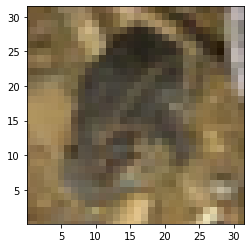

In [ ]:
teste = get_input_vector(arr)
npa = input_vector_to_intarray(teste)
npa = intarray_to_pre_img(npa)
show_img(npa)

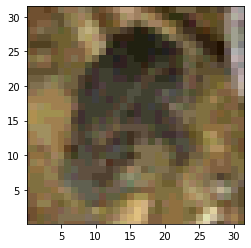

In [ ]:
teste = get_input_vector(arr)
npa = input_vector_to_intarray(teste,4)
npa = intarray_to_pre_img(npa)
show_img(npa)

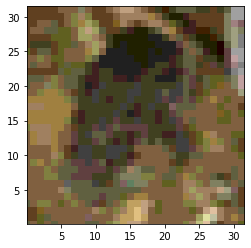

In [ ]:
teste = get_input_vector(arr)
npa = input_vector_to_intarray(teste,3)
npa = intarray_to_pre_img(npa)
show_img(npa)

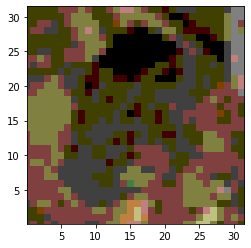

In [ ]:
teste = get_input_vector(arr)
npa = input_vector_to_intarray(teste,2)
npa = intarray_to_pre_img(npa)
show_img(npa)

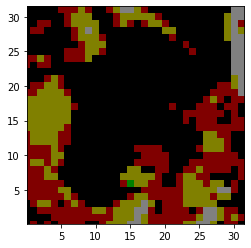

In [ ]:
teste = get_input_vector(arr)
npa = input_vector_to_intarray(teste,1)
npa = intarray_to_pre_img(npa)
show_img(npa)

#Criando PLAs

In [ ]:
train_files = ["data_batch_1",
               "data_batch_2",
               "data_batch_3",
               "data_batch_4",
               "data_batch_5"]

classes = {0 : "0000000001",
           1 : "0000000010",
           2 : "0000000100",
           3 : "0000001000",
           4 : "0000010000",
           5 : "0000100000",
           6 : "0001000000",
           7 : "0010000000",
           8 : "0100000000",           
           9 : "1000000000"}
# 0 [b'airplane',
# 1 b'automobile',
# 2 b'bird',
# 3 b'cat',
# 4 b'deer',
# 5 b'dog',
# 6 b'frog',
# 7 b'horse',
# 8 b'ship',
# 9 b'truck'],

lista = []
pla_lines = []


pla_lines.append(".i 24576")
pla_lines.append(".o 10")
pla_lines.append(".p 50000")

for f in train_files:
  dados = unpickle(f)
  for counter,v in enumerate(dados.get(b'data')):
    #arr = get_3_32_32_int_array(v)
    #get_input_vector(arr)

    pla_lines.append("%s %s" % (get_input_vector_cifar10_raw(v), classes.get(dados.get(b'labels')[counter])))
  print("Finalizou arquivo!!!")
  #print(type(dados.get(b'data')))
  #print(dados.get(b'data').size)
pla_lines.append(".e")

Finalizou arquivo!!!
Finalizou arquivo!!!
Finalizou arquivo!!!
Finalizou arquivo!!!
Finalizou arquivo!!!


In [ ]:
with open('pla_memory.pla', mode='w') as arq:
  for line in pla_lines:
    arq.write(line + "\n")

In [ ]:
print(pla_lines[10])

0001110000011110001000010011111000111111000111110001110100101010001101110100001101011100010011000011100101001011010001010011100101001010011000100101011001000111001110110011111000111001001010100011001100101110001010010010011000100101001010110011010000101110000110110001101100010101001001100011110000100111001010010010111100110000010010000111100001100111010000100100101101101110100001101001001010011001100100101000101101111101100000100110110101001100010100100101010101010010010110110110001101110000011101010111001100100010001000010001100000100110010100100011010000101011001101110100000101110001100111011000111001101100011011001001100010111001101100111011001010110100101110001011011010110001101010111010010110100110101010001010010110100111101010011010111110110001101100000010110100110001001011100011011101010011001111100010110000101101001101100101101101101100011001000111011110010000101100011100001010111111110001101100111011001101110010001100100011000001110000001100001011000010110010111100011111000000

In [ ]:
with open("pla_memory_chunk_625.pla", mode='r') as file:
  for counter,line in enumerate(file.readlines()):  
    print("%s - %s" % (str(counter), str(len(line))))

FileNotFoundError: ignored

In [ ]:
!head -5 pla_memory.pla

.i 24576
.o 10
.p 50000
0011101100101011001100100100010001100010011101111000101110010001100101011001010110000011011111011000111010010000100010011000000110001001100001100111110010001011100010111000010110001000100010111001100010100011101010001001111110011110100111101001100010010100000100000000000000010010001100110101100001111000100000000111111101111110011101000110101001100101011010010111000101101101011100000111011101101101011010010111110101111111011110101000001101111100011110011000001110000100100001011000010101111011011101110111101000011001000100000011000101010011011011101000000110000010011110010111000101110000011100000110101001101001100000000111110010000010011111110111101001110011011110001000001010000011100010110111111101111110011111111000001010001110100000100111011001111000011011010010000100100110010101110110101001110011011101010111001001101001011010110111100101111101011011010111000110010010100001010111111101110110011101010111111101111010100001001000100110001000100000110111110010000010